In [8]:
import numpy  as np
import matplotlib.pyplot as plt

In [9]:
def find_b_from_data(L, f):
    log_L = np.log10(L)
    log_f = np.log10(f)
    b, log_C = np.polyfit(log_L, log_f, 1)
    return b

In [10]:
def new_data_from_normal_distribution(L, f, delta_L, delta_f):
    new_L = np.random.normal(loc=L, scale=delta_L)
    new_f = np.random.normal(loc=f, scale=delta_f)
    return new_L, new_f

In [11]:
def new_data_from_jackknife(L, f):
    n = len(L)
    ids = np.arange(n)
    new_ids = np.random.choice(ids, size=n)
    return L[ids], f[ids]

In [18]:
def estimate_b_with_uncertainty(L, f, delta_L, delta_f, N_iterations=100):
    b_values = np.zeros(N_iterations)
    for i in range(N_iterations):
        new_L, new_f = new_data_from_normal_distribution(L, f, delta_L, delta_f)
        new_L, new_f = new_data_from_jackknife(new_L, new_f)
        b_values[i] = find_b_from_data(new_L, new_f)
    return b_values.mean(), b_values.std()

In [19]:
def is_b_consistent_with_theory(L, f, delta_L, delta_f):
    b, delta_b = estimate_b_with_uncertainty(L, f, delta_L, delta_f)
    b_theory = -1.0
    if np.abs(b - b_theory) < 3.0*delta_b:
        return True
    else:
        return False

Text(0, 0.5, '$\\delta_f$ (Hz)')

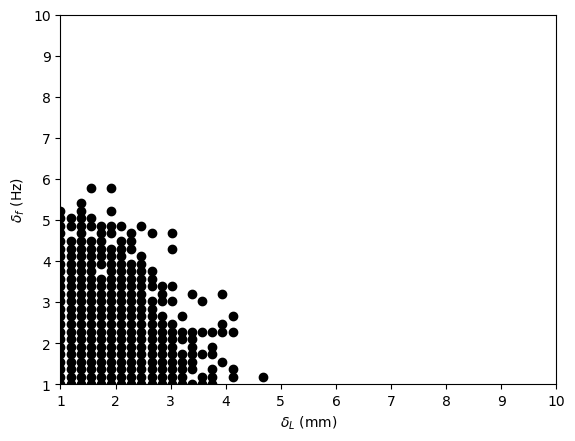

In [20]:
L = np.array([114.0, 130.0, 140.0, 150.0, 180.0])
f = np.array([330.0, 307.0, 280.0, 258.0, 231.0])

n_delta = 50
delta_L_values = np.linspace(1.0, 10.0, n_delta)
delta_f_values = np.linspace(1.0, 10.0, n_delta)

for delta_L in delta_L_values:
    for delta_f in delta_f_values:
        is_consistent = is_b_consistent_with_theory(L, f, delta_L, delta_f)
        if not is_consistent:
            plt.scatter(delta_L, delta_f, color='black')
plt.xlim(1,10)
plt.ylim(1,10)
plt.xlabel('$\delta_L$ (mm)')
plt.ylabel('$\delta_f$ (Hz)')